# Stratified Random Sampling - European Parties - European Committee of the Regions - Policy Incubator Project 2020
# (This is a partial revision of the [initial](https://github.com/Jacobs007/Stratified-Random-Sampling/blob/master/Stratified%20Random%20Sampling%20for%20Small-N%20StudiesV2.ipynb) process)

## *London School of Economics and Political Science*


### *European Institute*

#### Authors:
- Tim Jacobs
- Hande Taner
- Nicole Lawler
- Christian Zörner



**Disclaimer:**

This online appendix is part of a research project in cooperation with the *European Committee of the Regions*. Any views expressed in this research do not necessarily reflect those of the European Committee of the Regions. While writing this research, no author declared to have conflict of interest with the European Committee of the Regions nor any other organisation. We are grateful for the constructive comments of our project-supervisor Dr Miriam Sorace, but would like to emphasize that any error is the sole responsibility of the authors.

## This is a partial revision of the [initial](https://github.com/Jacobs007/Stratified-Random-Sampling/blob/master/Stratified%20Random%20Sampling%20for%20Small-N%20StudiesV2.ipynb) process

In [1]:
import random
import matplotlib.pyplot as plt

### Motivation:

Given the limited time available to conduct the joint-part of the policy-incubator and the difficulty we experienced with gathering party manifestos of some but mostly coalition parties, we decided to replace some of the parties in the initial sample. The parties we opted to take-out of the initial sample are listed in the table below.

| Party   | Group | Seats | country |
| --------------:--------:---------: -----: 
| Movement for Change (ΠΑΣΟΚ + ΔΗΣΥ + ΚΙΔΗΣΟ / PASOK + DISI + KIDISO) | EPP | 2 | Greece |
| Coalition (GERB/ГЕРБ | EPP | 6 | Bulgaria |
| Tėvynės sąjunga - Lietuvos krikščionys demokratai | EPP | 3 | Lithuania |
| Partidul Mișcarea Populară | EPP | 2 | Romania | 
| Coalition (SDS + SLS) | EPP | 3 | Slovenia |
| Partidul Pro Romania | S&D | 2 | Romania | 
| Socialistische Partij - Anders | S&D | 1 | Belgium |
| Wiosna | S&D | 3 | Poland |
| Coalition Koalicja Europejska (PO + PSL + SLD + .N + Z)2 | S&D | 5 | Poland |
| Lietuvos lenkų rinkimų akcija - krikščioniškų šeimų sąjunga | ECR | 1 | Lithuania |
| Lista Marjana Šarca | Renew Europe | 2 | Slovenia|
| Fianna Fáil Party | Renew Europe | 1 | Ireland |
| Svenska folkpartiet (Ruotsalainen kansanpuolue) | Renew Europe | 1 | Finland |
| Coalition AP! (Latvijas attīstībai + Par!) | Renew Europe | 1 | Latvia |
| Coalition Unidas Podemos Cambiar Europa (UP + IU + Catalunya en Comú + Barcelona en Comú) | GUE/NGL | 5 | Spain |
| Coligação Democrática Unitária (PCP + PEV) | GUE/NGL | 2 | Portugal |
| Partei für Arbeit, Rechtsstaat, Tierschutz, Elitenförderung und basisdemokratische Initiative | Greens/EFA | 2 | Germany |
| Svoboda a přímá demokracie | ID | 2 | Czechia |

<a id='section_id'></a>

Systematically dropping coalition parties introduces a major bias in the representativeness of our sample but is necessary for the feasibility of the research. Overall the drop will shift the representativeness of our sample, and thus our analysis, towards the representation of large(r) national parties.

18 parties have been dropped from the initial sample (51.4%).

After dropping the initial sample and all remaining coalition parties from the population of parties, the list below gives the "new" population of parties to sample 18 new parties from.

In [2]:
population = {
    "Christlich Demokratische Union Deutschlands":"EPP",
    "Sozialdemokratische Partei Deutschlands":"SD",
    "Alternative für Deutschland":"ID",
    "Die Linke":"GUE/NGL",
    "Freie Demokratische Partei":"Renew Europe",
    "Freie Wähler":"Renew Europe",
    "PARTEI MENSCH UMWELT TIERSCHUTZ":"GUE/NGL",
    "Ökologisch-Demokratische Partei":"Greens/EFA",
    "Piratenpartei Deutschland":"Greens/EFA",
    "Familien-Partei Deutschlands":"ECR",
    "VOLT":"Greens/EFA",
    "Europe écologie-Les verts":"Greens/EFA",
    "Les Républicains":"EPP",
    "France insoumise":"GUE/NGL",
    "Lega Salvini Premier":"ID",
    "Partito Democratico":"SD",
    "Movimento Cinque Stelle":"NI",
    "Fratelli d'Itali":"ECR",
    "Südtiroler Volkspartei":"EPP",
    "Partido Popular":"EPP",
    "VOX ":"ECR",
    "Prawo i Sprawiedliwoś":"ECR",
    "Partidul Naţional Liberal":"EPP",
    "Partidul Social Democrat":"SD",
    "Romániai Magyar Demokrata Szövetség/Uniunea Democrată Maghiară din România":"EPP",
    "Partij van de Arbeid":"SD",
    "Volkspartij voor Vrijheid en Democratie":"Renew Europe",
    "Christen-Democratisch Appèl":"EPP",
    "Forum voor Democratie":"ECR",
    "Democraten 66":"Renew Europe",
    "Partij voor de Dieren":"GUE/NGL",
    "50+":"EPP",
    "Vlaams Belang":"ID",
    "Parti Socialiste":"SD",
    "Open Vlaamse Liberalen en Democraten":"Renew Europe",
    "Christen-Democratisch & Vlaams":"EPP",
    "Ecologistes Confédérés pour l'Organisation de Luttes Originales":"Greens/EFA",
    "Mouvement Réformateur":"Renew Europe",
    "Groen":"Greens/EFA",
    "Christlich Soziale Partei":"EPP",
    "Communist Party of Greece":"NI",
    "Golden Dawn":"NI",
    "ANO 2011":"Renew Europe",
    "Občanská demokratická strana":"ECR",
    "STAROSTOVÉ (STAN) s regionálními partnery a TOP 09":"EPP",
    "Křesťanská a demokratická unie – Československá strana lidová":"EPP",
    "Partido Social Democrata":"EPP",
    "Bloco de Esquerda":"GUE/NGL",
    "CDS - Partido Popular":"EPP",
    "Pessoas–Animais–Natureza":"Greens/EFA",
    "Socialdemokraterna":"SD",
    "Moderaterna":"EPP",
    "Sverigedemokraterna":"ECR",
    "Miljöpartiet de Gröna":"Greens/EFA",
    "Centerpartiet":"Renew Europe",
    "Vänsterpartiet":"GUE/NGL",
    "Liberalerna":"Renew Europe",
    "Demokratikus Koalíció":"SD",
    "Momentum Mozgalom":"Renew Europe",
    "Jobbik Magyarországért Mozgalom":"NI",
    "Österreichische Volkspartei":"EPP",
    "Sozialdemokratische Partei Österreich":"SD",
    "Freiheitliche Partei Österreichs":"ID",
    "Die Grünen - Die Grüne Alternative":"Greens/EFA",
    "NEOS - Das neue Österreich":"Renew Europe",
    "Bulgarska sotsialisticheska partiya":"SD",
    "Dvizhenie za prava i svobodi":"Renew Europe",
    "VMRO - Bulgarsko Natsionalno Dvizhenie":"ECR",
    "Demokratichna Bulgaria ":"EPP",
    "Socialdemokratiet":"SD",
    "Socialistisk Folkeparti":"Greens/EFA",
    "Det Radikale Venstre":"Renew Europe",
    "Dansk Folkeparti":"ID",
    "Det Konservative Folkeparti":"EPP",
    "Enhedslisten, de Rød-Grønne":"GUE/NGL",
    "Kansallinen Kokoomus":"EPP",
    "Vihreä liitto":"Greens/EFA",
    "Suomen Sosialidemokraattinen Puolue/Finlands Socialdemokratiska Parti":"SD",
    "Perussuomalaiset":"ID",
    "Suomen Keskusta":"Renew Europe",
    "Vasemmistoliitto":"GUE/NGL",
    "SMER - Sociálna demokracia":"SD",
    "Kotleba - Ľudová strana Naše Slovensko":"NI",
    "Sloboda a Solidarita":"ECR",
    "Kresťanskodemokratické hnutie":"EPP",
    "Fine Gael Party":"EPP",
    "Green Party":"Greens/EFA",
    "Independents 4 Change":"GUE/NGL",
    "Sinn Féin":"GUE/NGL",
    "Independents":"GUE/NGL",
    "Hrvatska demokratska zajednica":"EPP",
    "Socijaldemokratska partija Hrvatske":"SD",
    "Independent Mislav Kolakušić":"NI",
    "Živi zid":"NI",
    "Lietuvos socialdemokratų partija":"SD",
    "Lietuvos Valstiečių ir Žaliųjų Sąjunga":"Greens/EFA",
    "Darbo partija":"Renew Europe",
    "Lietuvos Respublikos liberalų sąjūdis":"Renew Europe",
    "Visuomeninis rinkimų komitetas Aušros Maldeikienės traukinys":"EPP",
    "Socialni demokrati":"SD",
    "Nova Slovenija":"EPP",
    "Jaunā Vienotība":"EPP",
    "Saskaņa Sociāldemokrātiskā partija":"SD",
    "Latvijas Krievu savienībā":"EFA",
    "Eesti Reformierakond":"Renew Europe",
    "Sotsiaaldemokraatlik Erakond":"SD",
    "Eesti Konservatiivne Rahvaerakond":"ID",
    "Demokratesch Partei/Parti démocratique":"Renew Europe",
    "Chrëschtlech-Sozial Vollekspartei/Parti populaire chrétien-social":"EPP",
    "Déi Gréng/Les Verts":"Greens/EFA",
    "Lëtzebuerger Sozialistesch Aarbechterpartei/Parti ouvrier socialiste luxembourgeois":"SD",
    "Partit Laburista/Malta Labour Party":"SD",
    "Partit Nazzjonalista/Nationalist Party":"EPP"
} 

In [3]:
EPP_parties = []
SD_parties = []
ECR_parties = []
Renew_Europe_parties = []
GUE_NGL_parties = []
Greens_EFA_parties = []
ID_parties = []

for x,j in population.items():
    if j == "EPP":
        EPP_parties.append(x)
        
for x,j in population.items():
    if j == "SD":
        SD_parties.append(x)

for x,j in population.items():
    if j == "ECR":
        ECR_parties.append(x)

for x,j in population.items():
    if j == "Renew Europe":
        Renew_Europe_parties.append(x)

for x,j in population.items():
    if j == "GUE/NGL":
        GUE_NGL_parties.append(x)
        
for x,j in population.items():
    if j == "Greens/EFA":
        Greens_EFA_parties.append(x)

for x,j in population.items():
    if j == "ID":
        ID_parties.append(x)

        
print("There are", len(EPP_parties)+len(SD_parties)+len(ECR_parties)+len(Renew_Europe_parties)+len(GUE_NGL_parties)+len(Greens_EFA_parties)+len(ID_parties), "parties in the [new] dataset to sample the remaining 18 parties from.")


# "K" refers to the number of parties to be replaced from each party group (see also the table at the top of this notebook).
def subsample_EPP():
    return random.sample(EPP_parties, k=5)

def subsample_SD():
    return random.sample(SD_parties, k=4)

def subsample_ECR():
    return random.sample(ECR_parties, k=1)

def subsample_Renew_Europe():
    return random.sample(Renew_Europe_parties, k=4)

def subsample_GUE_NGL():
    return random.sample(GUE_NGL_parties, k=2)

def subsample_Greens_EFA():
    return random.sample(Greens_EFA_parties, k=1)

def subsample_ID():
    return random.sample(ID_parties, k=1)

def subsample():
    return subsample_EPP()+subsample_SD()+subsample_ECR()+subsample_Renew_Europe()+subsample_GUE_NGL()+subsample_Greens_EFA()+subsample_ID()
print("Replaced part of the stratified random sample to be used for the project's analysis:", subsample())

There are 105 parties in the [new] dataset to sample the remaining 18 parties from.
Replaced part of the stratified random sample to be used for the project's analysis: ['Det Konservative Folkeparti', 'Österreichische Volkspartei', 'Chrëschtlech-Sozial Vollekspartei/Parti populaire chrétien-social', 'Kresťanskodemokratické hnutie', 'Kansallinen Kokoomus', 'Partij van de Arbeid', 'Partidul Social Democrat', 'Socialdemokratiet', 'Socialdemokraterna', 'Prawo i Sprawiedliwoś', 'Centerpartiet', 'Suomen Keskusta', 'Det Radikale Venstre', 'Demokratesch Partei/Parti démocratique', 'Independents', 'PARTEI MENSCH UMWELT TIERSCHUTZ', 'Socialistisk Folkeparti', 'Perussuomalaiset']


## Balance Check

The obtained randomly sampled parties are merged with the parties from the initial dataset on which we found the manifestos. The new sample is checked for balance in the table below. The initial table can be found [here](https://github.com/Jacobs007/Stratified-Random-Sampling/blob/master/Stratified%20Random%20Sampling%20for%20Small-N%20StudiesV2.ipynb).

| Party   | Group | Seats | country |
| --------------:-----------------: -----: 
|Centre Démocrate Humaniste | EPP | 1 | Belgium |
|Forza Italia | EPP | 6 | Italy |
|Det Konservative Folkeparti| EPP |1|Denmark|
|Österreichische Volkspartei| EPP |7|Austria|
|Chrëschtlech-Sozial Vollekspartei/Parti populaire chrétien-social| EPP |2|Luxembourg|
|Kansallinen Kokoomus| EPP |3|Finland|
|New Democracy| EPP | 8 |Greece |
|Kristdemokraterna  |EPP| 2 | Sweden|
|Kresťanskodemokratické hnutie|EPP|1|Slovakia|
|Partij van de Arbeid| S&D |6|Netherlands|
|Partidul Social Democrat| S&D |8|Romania|
|Socialdemokratiet|S&D|3|Denmark|
|Partido Socialista Obrero Español + Partido de los Socialistas de Cataluña | S&D |20 | Spain |
|Partido Socialista |S&D  |9|Portugal |
|Socialdemokraterna|S&D|5|Sweden|
|Nieuw-Vlaamse Alliantie| ECR |3  |Belgium  |
|Greek Solution |ECR  |1  |Greece |
|Prawo i Sprawiedliwoś|ECR|26|Poland|
|Centerpartiet|Renw Europe|2|Sweden|
|Suomen Keskusta|Renew Europe|2|Finland|
|Det Radikale Venstre|Renew Europe|2|Denmark|
|Eesti Keskerakond  |Renew Europe |1  |Estonia  |
|Ciudadanos - Partido de la Ciudadanía  | Renew Europe  | 7 |Spain  |
|Demokratesch Partei/Parti démocratique|Renew Europe |2|Luxembourg |
|Venstre, Danmarks Liberale Parti | Renew Europe  | 3 | Denmark |
|Independents| GUE/NGL |1|Ireland|
|Parti du Travail de Belgique | GUE/NGL | 1 |Belgium  |
|PARTEI MENSCH UMWELT TIERSCHUTZ| GUE/NGL |1|Germany|
|Komunistická strana Čech a Moravy  | GUE/NGL |1| Czechia |
|Die Grünen | Greens/EFA  |21 | Germany |
|GroenLinks | Greens/EFA  | 3 | Netherlands |
|Česká pirátská strana| Greens/EFA  |3  |Czechia  |
|Socialistisk Folkeparti|Greens/EFA|2|Denmark|
|Perussuomalaiset|ID|2|Finland|
|Rassemblement national |ID | 22  |France |

The number of parties sampled from each political group is determined by the stratification strategy (see detailed explanation [here](https://github.com/Jacobs007/Stratified-Random-Sampling/blob/master/Stratified%20Random%20Sampling%20for%20Small-N%20StudiesV2.ipynb)). The sample distribution of seats is plotted below and matches the distribution of the population statistic as displayed [here](https://github.com/Jacobs007/Stratified-Random-Sampling/blob/master/Stratified%20Random%20Sampling%20for%20Small-N%20StudiesV2.ipynb) fairly well. Yet, the top-percentile largest parties, in terms of seats, are somewhat overrepresented while those with 10 to 20 seats are missing in the sample. Moreover, the sample comprises 19 different member states and no member-state is represented more than five times in the sample (Denmark). Sweden and Finland are each represented three times (as well is Belgium) which slightly overrepresents the Nordic states. Nevertheless, in general it can be concluded that the sampling procedure yielded a sufficiently representative sample which can be used for the analysis of the research project, taking into consideration the remarks as expressed [here](#section_id).

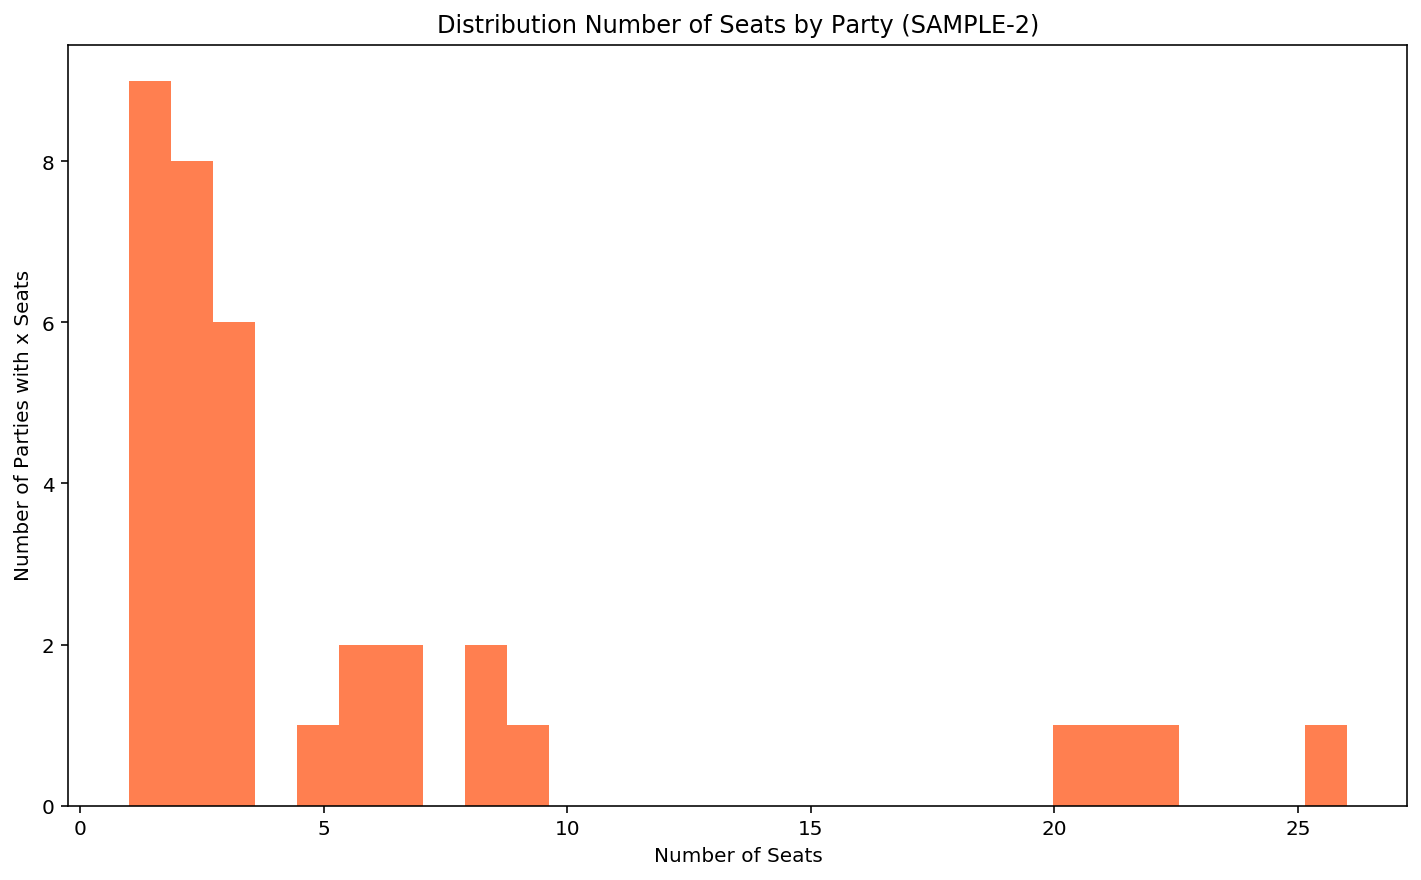

In [4]:
seats_table = [1,6,1,7,2,3,8,2,1,6,8,3,20,9,5,3,1,26,2,2,2,1,7,2,3,1,1,1,1,21,3,3,2,2,22]

plt.hist(seats_table, color="coral", bins=29)
plt.xlabel("Number of Seats")
plt.ylabel("Number of Parties with x Seats")
plt.title("Distribution Number of Seats by Party (SAMPLE-2)")
plt.show()